In [1]:
import numpy as np
import seaborn as sns
import csv
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels

df = pd.read_csv(r'glm.csv')
df_adj = pd.read_csv(r'glm_adj.csv')


In [2]:
scatter = pd.DataFrame()
scatter.insert(0,'x',df['Estimate'])
scatter.insert(1,'y', df_adj['adjusted_mle'])
print(scatter)

           x         y
0   0.052351  0.044636
1   0.048599  0.041437
2   0.014807  0.012625
3  -0.032072 -0.027345
4  -0.009427 -0.008038
..       ...       ...
95  0.010935  0.009323
96 -0.023300 -0.019867
97  0.185612  0.158258
98 -0.000316 -0.000269
99  0.055144  0.047017

[100 rows x 2 columns]


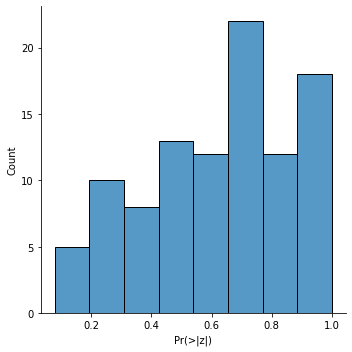

In [3]:
sns.displot(df,x = "Pr(>|z|)")

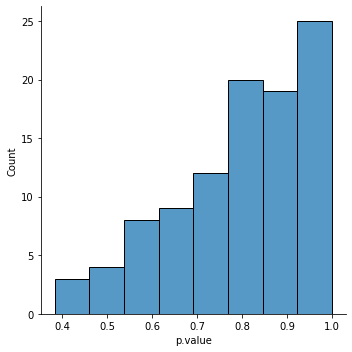

In [4]:
sns.displot(df_adj,x="p.value")

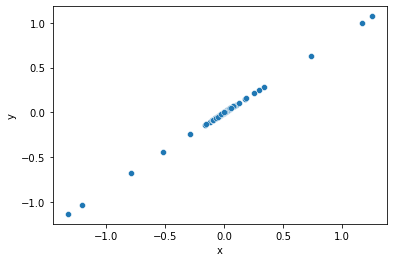

In [12]:
sns.scatterplot(data = scatter, x = 'x', y = 'y')